Importación, limpieza y análisis de estadística criminal de la Ciudad Autónoma de Buenos Aires

In [1]:
# Importar librearias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Importar tablas

d21 = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/delitos_2021.csv", sep = ';')
d20 = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/delitos_2020.csv")
d19 = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/delitos_2019.csv", dtype={'franja_horaria': object})
d18 = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/delitos_2018.csv")
d17 = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/delitos_2017.csv")
dms = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/snic-departamentos-mes-sexo.csv",sep=';', encoding='latin-1')
dept = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/snic-departamentos.csv",sep=';',encoding='latin-1')
prov = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/snic-provincias.csv")
pob = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/caba_pob_barrios_2010.csv")
    
# Unir verticalmente las tablas: d de20, d19, d18, d17



In [ ]:
#-----------Tabla 2021--------------

# Limpiar la columna "franja"

d21['franja'] = d21['franja'].astype(str)

d21['franja'] = d21.franja.apply(lambda s: s+':00:00')

d21.loc[d21.franja == "SD:00:00", 'franja'] = np.nan

d21.loc[d21.franja == "sd:00:00", 'franja'] = np.nan

# Limpiar la columna "fecha"

fechayhora = d21.fecha.str.cat(d21.franja, sep=' ')


d21['fechaco'] = pd.to_datetime(fechayhora)

d21["fecha"] = pd.to_datetime(d21['fecha'], format='%d/%m/%Y')

# Cambiar tipo de columna

d21['comuna'] = d21['comuna'].astype("category")

# Limpiar columnas "Comuna", "Cantidad", "Fechaco"

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d21['comuna'] = d21['comuna'].apply(convert)

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d21['cantidad'] = d21['cantidad'].apply(convert)

d21['day'] = pd.DatetimeIndex(d21['fechaco']).day

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d21['day'] = d21['day'].apply(convert)

# Limpiar los nombres

d21['dia'].replace(['viernes', 'domingo',"Miércoles","miércoles", "lunes", "jueves", "martes", "Sábado","sábado"],
                   ["Viernes","Domingo","Miercoles","Miercoles","Lunes", "Jueves","Martes", "Sabado","Sabado"], inplace=True)

#---------------Tabla 2020----------------


d20['franja'] = d20['franja'].astype(str)

d20['franja'] = d20.franja.apply(lambda s: s+':00:00')

d20.loc[d20.franja == "SD:00:00", 'franja'] = np.nan

d20.loc[d20.franja == "sd:00:00", 'franja'] = np.nan

fechayhora = d20.fecha.str.cat(d20.franja, sep=' ')

d20['fechaco'] = pd.to_datetime(fechayhora)

d20["fecha"] = pd.to_datetime(d20['fecha'])

d20['comuna'] = d20['comuna'].astype("category")

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d20['comuna'] = d20['comuna'].apply(convert)

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d20['victimas'] = d20['victimas'].apply(convert)

d20['day'] = pd.DatetimeIndex(d20['fechaco']).day

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d20['day'] = d20['day'].apply(convert)

d20['dia'].replace(['viernes', 'domingo',"Miércoles", "lunes", "martes", "Sábado"],
                   ["Viernes","Domingo","Miercoles","Lunes","Martes", "Sabado"], inplace=True)

#------------Tabla 2019----------------

# Limpiar y agregar año, mes y dia

d19['fecha'] = pd.to_datetime(d19['fecha'])

d19['months'] = pd.DatetimeIndex(d19['fecha']).month
d19['year'] = pd.DatetimeIndex(d19['fecha']).year
d19['day'] = pd.DatetimeIndex(d19['fecha']).day

d19['mes'] = d19['fecha'].dt.month_name()
d19["dia"] = d19['fecha'].dt.day_name()

# Limpiar nombres de las distintas fechas

d19['dia'].unique()

d19['dia'].replace(['Friday', 'Sunday',"Wednesday", "Monday", "Thursday", "Tuesday", "Saturday"],
                   ["Viernes","Domingo","Miercoles","Lunes", "Jueves","Martes", "Sabado"], inplace=True)

d19['mes'].unique()

d19['mes'].replace(['September', 'October', 'November', 'December', 'January','February', 'March', 'April', 'May', 'June', 'July', 'August'],
                   ['Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto'], inplace=True)

d19['franja_horaria'] = d19['franja_horaria'].astype(str)

d19['fecha'] = d19['fecha'].astype(str)

d19['franja_horaria'] = d19.franja_horaria.apply(lambda s: s+':00:00')

d19.loc[d19.franja_horaria == "SD:00:00", 'franja_horaria'] = np.nan

d19.loc[d19.franja_horaria == "S/D:00:00", 'franja_horaria'] = np.nan

d19.loc[d19.franja_horaria == "sd:00:00", 'franja_horaria'] = np.nan

fechayhora = d19.fecha.str.cat(d19.franja_horaria, sep=' ')

d19['fechaco'] = pd.to_datetime(fechayhora)

d19["fecha"] = pd.to_datetime(d19['fecha'])

d19['comuna'] = d19['comuna'].astype("category")

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d19['comuna'] = d19['comuna'].apply(convert)

convert = lambda x: '%.f' % x if isinstance(x,float) else x
d19['cantidad_registrada'] = d19['cantidad_registrada'].apply(convert)

#-----------Tabla 2018-------------

d18['fecha'] = pd.to_datetime(d18['fecha'])

d18['months'] = pd.DatetimeIndex(d18['fecha']).month
d18['year'] = pd.DatetimeIndex(d18['fecha']).year
d18['day'] = pd.DatetimeIndex(d18['fecha']).day

d18['mes'] = d18['fecha'].dt.month_name()
d18["dia"] = d18['fecha'].dt.day_name()

d18['dia'].unique()

d18['dia'].replace(['Friday', 'Sunday',"Wednesday", "Monday", "Thursday", "Tuesday", "Saturday"],
                   ["Viernes","Domingo","Miercoles","Lunes", "Jueves","Martes", "Sabado"], inplace=True)

d18['mes'].unique()

d18['mes'].replace(['September', 'October', 'November', 'December', 'January','February', 'March', 'April', 'May', 'June', 'July', 'August'],
                   ['Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto'], inplace=True)


d18['fecha'] = d18['fecha'].astype(str)

d18['franja_horaria'] = d18.franja_horaria.apply(lambda s: s+':00:00')

d18.loc[d18.franja_horaria == "SD:00:00", 'franja_horaria'] = np.nan

d18.loc[d18.franja_horaria == "S/D:00:00", 'franja_horaria'] = np.nan

d18.loc[d18.franja_horaria == "sd:00:00", 'franja_horaria'] = np.nan

fechayhora = d18.fecha.str.cat(d18.franja_horaria, sep=' ')

d18['fechaco'] = pd.to_datetime(fechayhora)

d18["fecha"] = pd.to_datetime(d18['fecha'])

d18['comuna'] = d18['comuna'].astype("category")

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d18['comuna'] = d18['comuna'].apply(convert)

convert = lambda x: '%.f' % x if isinstance(x,float) else x
d18['cantidad_registrada'] = d18['cantidad_registrada'].apply(convert)

#------------Tabla 2017--------------

d17['fecha'] = pd.to_datetime(d17['fecha'])

d17['months'] = pd.DatetimeIndex(d17['fecha']).month
d17['year'] = pd.DatetimeIndex(d17['fecha']).year
d17['day'] = pd.DatetimeIndex(d17['fecha']).day

d17['mes'] = d17['fecha'].dt.month_name()
d17["dia"] = d17['fecha'].dt.day_name()

d17['dia'].unique()

d17['dia'].replace(['Friday', 'Sunday',"Wednesday", "Monday", "Thursday", "Tuesday", "Saturday"],
                   ["Viernes","Domingo","Miercoles","Lunes", "Jueves","Martes", "Sabado"], inplace=True)

d17['mes'].unique()

d17['mes'].replace(['September', 'October', 'November', 'December', 'January','February', 'March', 'April', 'May', 'June', 'July', 'August'],
                   ['Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto'], inplace=True)

d17['fecha'] = d17['fecha'].astype(str)

d17['franja_horaria'] = d17['franja_horaria'].astype(str)

d17['franja_horaria'] = d17.franja_horaria.apply(lambda s: s+':00:00')

d17.loc[d17.franja_horaria == "SD:00:00", 'franja_horaria'] = np.nan

d17.loc[d17.franja_horaria == "S/D:00:00", 'franja_horaria'] = np.nan

d17.loc[d17.franja_horaria == "sd:00:00", 'franja_horaria'] = np.nan

fechayhora = d17.fecha.str.cat(d17.franja_horaria, sep=' ')

d17['fechaco'] = pd.to_datetime(fechayhora)

d17["fecha"] = pd.to_datetime(d17['fecha'])

d17['comuna'] = d17['comuna'].astype("category")

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d17['comuna'] = d17['comuna'].apply(convert)

convert = lambda x: '%.f' % x if isinstance(x,float) else x
d17['cantidad_registrada'] = d17['cantidad_registrada'].apply(convert)

#----------------------

d17.loc[d17.duplicated() == True]

d18.loc[d18.duplicated() == True]

d19.loc[d19.duplicated() == True]

d20.loc[d20.duplicated() == True]

d21.loc[d21.duplicated() == True]

# Eliminar columnas que no van a tener uso

d21 = d21.drop(columns=['id-mapa',"day", "uso_armas"])

d20 = d20.drop(columns=['id_mapa',"day", "uso_armas"])

d19 = d19.drop(columns=['id', 'day', "months"])

d18 = d18.drop(columns=['id', 'day', "months"])

d17 = d17.drop(columns=['id', 'day', "months"])

# Renombrar columnas de las distintas tablas para despues poder unirlas

d21.rename(columns={'anio': 'año', 'fechaco': 'fecha_completa', 'franja':'hora', 'latitud':'lat', 'longitud':'long', 'cantidad': 'victimas'}, inplace=True)

d20.rename(columns={'anio': 'año', 'fechaco': 'fecha_completa', 'franja':'hora', 'latitud':'lat', 'longitud':'long'}, inplace=True)

d19.rename(columns={'tipo_delito': 'tipo', 'fechaco': 'fecha_completa', 'subtipo_delito':'subtipo', 'cantidad_registrada':'victimas', 'year':'año', 'franja_horaria':'hora'}, inplace=True)

d18.rename(columns={'tipo_delito': 'tipo', 'fechaco': 'fecha_completa', 'subtipo_delito':'subtipo', 'cantidad_registrada':'victimas', 'year':'año', 'franja_horaria':'hora'}, inplace=True)

d17.rename(columns={'tipo_delito': 'tipo', 'fechaco': 'fecha_completa', 'subtipo_delito':'subtipo', 'cantidad_registrada':'victimas', 'year':'año', 'franja_horaria':'hora'}, inplace=True)

# Unir las tablas 

fdata = pd.concat([d21, d20, d19, d18, d17], ignore_index=True)

# Cambiar el tipo de la columna "hora"

fdata['hora'] = fdata['hora'].astype("category")

# Limpiar valores null

fdata['victimas'].replace(['nan'],
                          [1], inplace=True)

#---------------------

fdata.isna().sum()

# Limpiar nuevas inconsistencias que surgieron con la union

crimes = fdata['barrio'].value_counts()
crimes.count()

fdata['barrio'].unique()

fdata['barrio'].replace(['Boca', 'Nueva pompeya', 'Villa Del Parque'],
                   ["La Boca","Nueva Pompeya", 'Villa del Parque'], inplace=True)

fdata['victimas'].replace([1],
                   ["1"], inplace=True)

fdata['barrio'].replace(['Boca', 'Nueva pompeya', 'Villa Del Parque'],
                   ["La Boca","Nueva Pompeya", 'Villa del Parque'], inplace=True)

# Agregar columna como index

fdata.set_index('fecha_completa', inplace = True)

# Corregir valores null

fdata.loc[fdata['barrio'].isnull(), 'comuna'] = np.nan

#-------------Tabla pob--------------

# Corregir titulos de columnas y valores de columna "barrio" del la tabla "pob"


pob = pob.rename(columns={'BARRIO':'barrio', 'POBLACION':'Poblacion'})

pob['barrio'] = pob['barrio'].str.title()

pob['barrio'].replace(['Agronomia', 'Constitucion', 'San Cristobal','San Nicolas','Velez Sarsfield','Villa Pueyrredon','Boca','Villa Del Parque'],
                   ['Agronomía', 'Constitución', 'San Cristóbal','San Nicolás','Vélez Sársfield','Villa Pueyrredón','La Boca','Villa del Parque'], inplace=True)


fdata = fdata.reset_index()

# Unir esta nueva tabla a la tabla "fdata"

fdata = pd.merge(fdata, pob, how = 'left', on = 'barrio')

#Corregir columna "Hora"

fdata["horas"] = fdata.hora.str[:-6]

# Limpiar valores que por NaN

fdata = fdata.replace('SD', np.nan, regex=True)
fdata = fdata.replace('nan', np.nan, regex=True)
fdata = fdata.replace('NaN', np.nan, regex=True)

# Limpiar columna de longitud y latitud debido a altas inconsistencias

fdata['lat'] = fdata['lat'].astype(str)

fdata['long'] = fdata['long'].astype(str)

fdata["lat"] = fdata['lat'].str.replace(',','.')

fdata["lat"] = fdata['lat'].str.replace('/','-')

fdata["long"] = fdata['long'].str.replace('/','-')

fdata["long"] = fdata['long'].str.replace(',','.')

fdata['lat'] = fdata['lat'].astype(float)

fdata['long'] = fdata['long'].astype(float)

# Limpiar y normalizar

fdata['Number'] = np.arange(len(fdata))

fdata['barrio'] = fdata['barrio'].str.upper()

fdata["barrio"] = fdata['barrio'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Preparar y agregar columnas para análisis estadístico

fdata['Number'] = 1

fdata['Tasa de criminalidad cada 100k'] = (fdata['Number']/fdata['Poblacion']) * 100000

#-


In [4]:
fdata.head()

,fecha_completa,año,mes,dia,fecha,hora,tipo,subtipo,barrio,comuna,lat,long,victimas,Poblacion,horas,Number,Tasa de criminalidad cada 100k
0,2021-06-01 18:00:00,2021,Enero,Miercoles,2021-01-06,18:00:00,Homicidio,Siniestro Vial,CONSTITUCION,1,-34.627610,-58.379146,1,44107.0,18,1,2.267214
1,2021-07-01 10:00:00,2021,Enero,Jueves,2021-01-07,10:00:00,Homicidio,Siniestro Vial,MATADEROS,9,-34.649730,-58.510590,1,64436.0,10,1,1.551927
2,2021-10-01 07:00:00,2021,Enero,Domingo,2021-01-10,7:00:00,Homicidio,Siniestro Vial,PARQUE CHACABUCO,7,-34.629172,-58.430581,1,56281.0,7,1,1.776799
3,2021-11-01 09:00:00,2021,Enero,Lunes,2021-01-11,9:00:00,Homicidio,Siniestro Vial,NUEVA POMPEYA,5,-34.638676,-58.414555,1,42695.0,9,1,2.342195
4,2021-11-01 21:00:00,2021,Enero,Lunes,2021-01-11,21:00:00,Homicidio,Siniestro Vial,PARQUE AVELLANEDA,9,-34.647714,-58.468066,1,53229.0,21,1,1.878675


In [3]:
# Tipo de crimen mas habitual

types = fdata['tipo'].value_counts()

types

Robo (con violencia)     281532
Hurto (sin violencia)    195882
Lesiones                  43524
Homicidio                  1135
Name: tipo, dtype: int64

In [6]:
# Barrio con mas robos

bar = fdata.loc[fdata.tipo == 'Robo (con violencia)']

bar = bar.groupby(by='barrio').agg({"dia":"count"})

maxrob = bar.sort_values(by = 'dia', ascending = False)

maxrob.head(3)

,dia
barrio,
Palermo,21358
Balvanera,18446
Flores,15056


In [7]:
# Barrio con menos robos

minrob = bar.sort_values(by = 'dia', ascending = True)

minrob.head(3)

,dia
barrio,
Puerto Madero,386
Agronomía,915
Parque Chas,918


In [4]:
# Barrio con mas homicidios

hom = fdata.loc[fdata.tipo == 'Homicidio']

hom = hom.groupby(by='barrio').agg({"dia":"count"})

maxh = hom.sort_values(by = 'dia', ascending = False)

maxh.head(3)


,dia
barrio,
FLORES,105
BARRACAS,90
RETIRO,75


In [9]:
# Barrio con menos homicidios

minh = hom.sort_values(by = 'dia', ascending = True)

minh.head(3)

,dia
barrio,
Coghlan,1
Villa Real,3
Versalles,3


In [10]:
# Meses con mas delitos

crimes = fdata.groupby(by='mes').agg({"dia":"count"})
maxcrimes = crimes.sort_values(by = 'dia', ascending = False)
maxcrimes.head(3)

,dia
mes,
Enero,47627
Noviembre,47204
Diciembre,46494


In [11]:
# Meses con menos delitos

mincrimes = crimes.sort_values(by = 'dia', ascending = True)
mincrimes.head(3)

,dia
mes,
Abril,8505
Mayo,8993
Junio,10457


Analisis completo

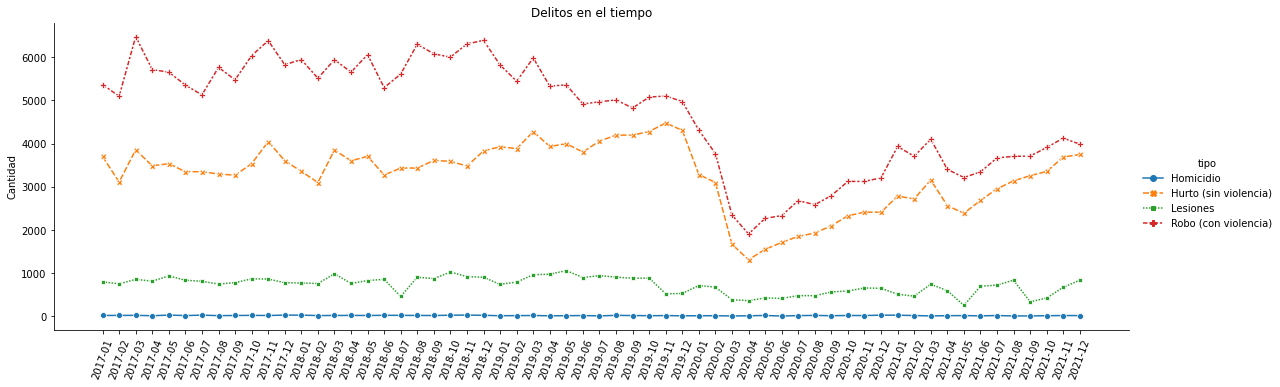

In [5]:
#Serie de tiempo de los distintos tipos de delitos

#La escala y dimensiones son correctas pero no se puede apreciar como fluctuaron los homicidios a travez del tiempo.

fdata1 = fdata

fdata1['fecha'] = fdata1['fecha'].dt.strftime('%Y-%m')

fdata1 = fdata1.reset_index()
fdata1 = fdata1.set_index('fecha')
fdata11 = fdata1.groupby(by=['fecha','tipo']).agg({'dia':'count'})

sns.relplot(x="fecha", y="dia",
            data=fdata11,
            hue="tipo",
            kind="line",
            style="tipo",
            height=5, aspect=3.2,
            markers=True
).set(
    title="Delitos en el tiempo", 
    ylabel="Cantidad",
    xlabel=None
)
plt.xticks(rotation=70)

plt.show()

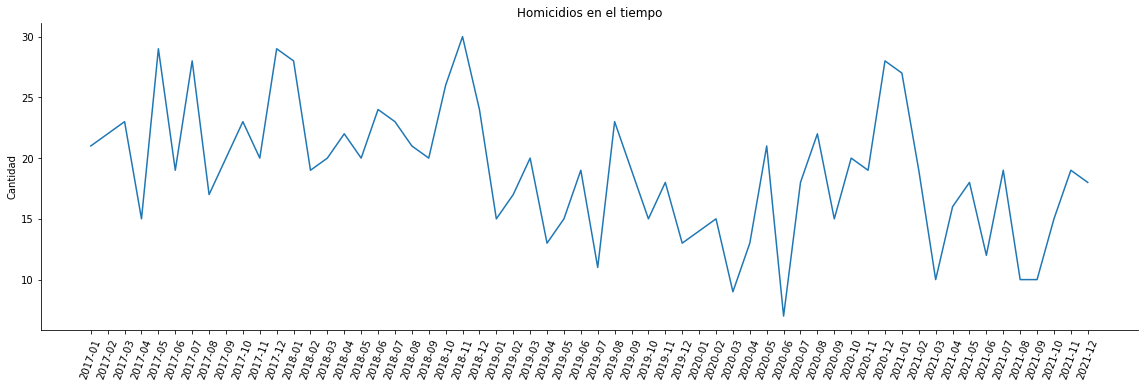

In [6]:
#Para no alterar las dimensiones y la escala, se realizo un grafico exclusivamente de homicidios para analizar su flctuacion a travez del tiempo.

fdata12 = fdata1.loc[fdata1.tipo == 'Homicidio']

fdata12 = fdata12.groupby(by='fecha').agg({'dia':'count'})

sns.relplot(x="fecha", y="dia",
            data=fdata12,
            kind="line",
            height=5, aspect=3.2
).set(
    title="Homicidios en el tiempo", 
    ylabel="Cantidad",
    xlabel=None
)
plt.xticks(rotation=70)

plt.show()


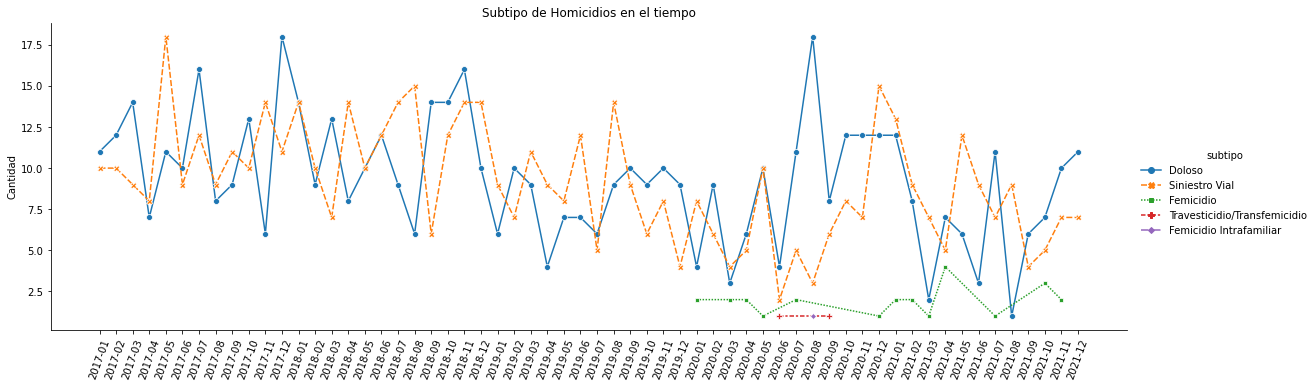

In [7]:
#Serie de tiempo de los distintos subtipos de homicidios

fdata14 = fdata1.loc[fdata1.tipo == 'Homicidio']

fdata14 = fdata14.groupby(by=['fecha','subtipo']).agg({'dia':'count'})

sns.relplot(x="fecha", y="dia",
            data=fdata14,
            hue="subtipo",
            kind="line",
            style="subtipo",
            height=5, aspect=3.2,
            markers=True
).set(
    title="Subtipo de Homicidios en el tiempo", 
    ylabel="Cantidad",
    xlabel=None
)
plt.xticks(rotation=70)

plt.show()


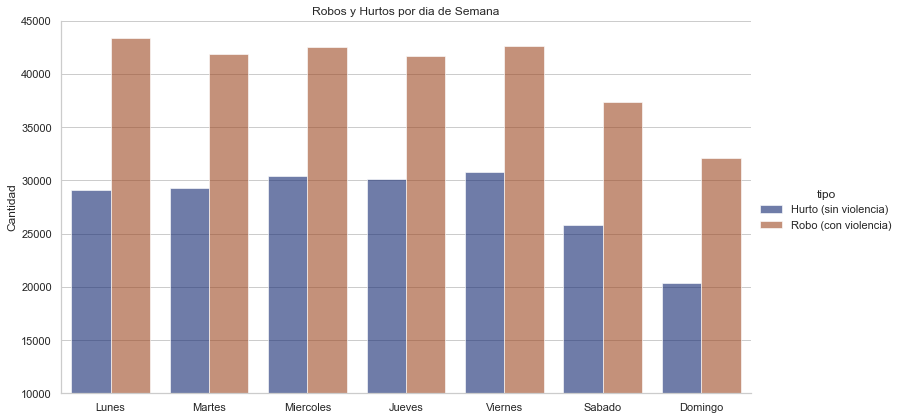

In [16]:
# Barras de lado a lado entre hurto y robos a travez de los distintos dias de la semana

rob = fdata[(fdata["tipo"]=='Hurto (sin violencia)') | (fdata["tipo"]=='Robo (con violencia)')]

rob = rob.groupby(by=['dia','tipo']).agg({'año':'count'})

rob = rob.reset_index()

sns.set_theme(style="whitegrid")



g = sns.catplot(
    data=rob, kind="bar",
    x="dia", y="año", hue="tipo",
    palette="dark", alpha=.6, height=6, aspect=1.8,
    order=("Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo")
).set(
    title="Robos y Hurtos por dia de Semana", 
    ylabel="Cantidad",
    xlabel=None
)
plt.ylim(10000, 45000)

plt.show()

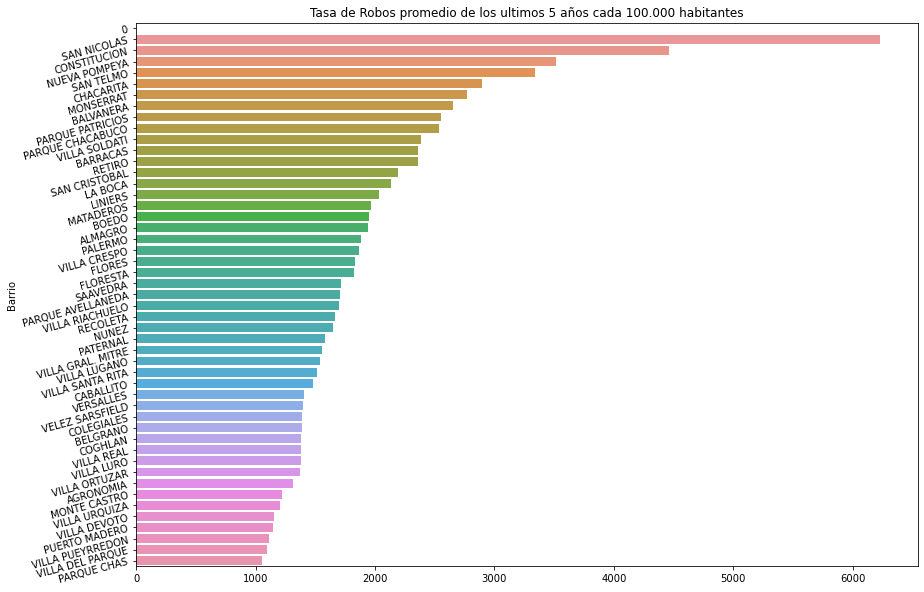

In [12]:
# Barras horizontales de tasa de Robos promedio de los ultimos 5 años cada 100.000 habitantes


robos21 = fdata.loc[fdata.tipo == "Robo (con violencia)"]
robos21 = robos21.loc[robos21.año == 2021]

robos21 = robos21.groupby("barrio",dropna=False).agg({"dia":"count"})


robos20 = fdata.loc[fdata.tipo == "Robo (con violencia)"]
robos20 = robos20.loc[robos20.año == 2020]

robos20 = robos20.groupby("barrio").agg({"dia":"count"})


robos19 = fdata.loc[fdata.tipo == "Robo (con violencia)"]
robos19 = robos19.loc[robos19.año == 2019]

robos19 = robos19.groupby("barrio").agg({"dia":"count"})


robos18 = fdata.loc[fdata.tipo == "Robo (con violencia)"]
robos18 = robos18.loc[robos18.año == 2018]

robos18 = robos18.groupby("barrio").agg({"dia":"count"})


robos17 = fdata.loc[fdata.tipo == "Robo (con violencia)"]
robos17 = robos17.loc[robos17.año == 2017]

robos17 = robos17.groupby("barrio").agg({"dia":"count"})


robos = robos17.merge(robos18, how = "outer", on = "barrio", suffixes=("2017","2018")) \
                    .merge(robos19, how = "outer", on = "barrio") \
                    .merge(robos20, how = "outer", on = "barrio",suffixes=("2019","2020")) \
                    .merge(robos21, how = "outer", on = "barrio") 

robos = robos.rename(columns={'dia2017':'2017', 'dia2018':'2018', 'dia2019':'2019', 'dia2020':'2020', 'dia':'2021'})

robos = robos.reset_index()

borr = fdata.groupby("barrio").agg({"Poblacion":"min"})

borr = borr.reset_index()

robos = borr.merge(robos, how = "outer", on = "barrio")

robos = robos.fillna(0)

robos['promedio'] = robos[['2017', '2018', '2019', '2020', '2021']].mean(axis=1)

robos['Tasa de robos 100.000 promedio'] = (robos['promedio']/robos['Poblacion'])*100000

robos = robos.sort_values('Tasa de robos 100.000 promedio', ascending=False)


plt.figure(figsize=(14, 10))

sns.barplot(
    x="Tasa de robos 100.000 promedio",
    y="barrio",
    data=robos
    
).set(
    title="Tasa de Robos promedio de los ultimos 5 años cada 100.000 habitantes", 
    ylabel="Barrio",
    xlabel=None
)
    
plt.yticks(rotation=15)
plt.show()

In [13]:
robos.sort_values("Tasa de robos 100.000 promedio", ascending=False).head()

,barrio,Poblacion,2017,2018,2019,2020,2021,promedio,Tasa de robos 100.000 promedio
48,0,0.0,0.0,0.0,0.0,0.0,375,75.0,inf
31,SAN NICOLAS,29273.0,2392.0,2503.0,2322.0,931.0,976,1824.8,6233.730742
10,CONSTITUCION,44107.0,2368.0,2297.0,2351.0,1151.0,1665,1966.4,4458.249257
18,NUEVA POMPEYA,42695.0,1689.0,1807.0,1751.0,1016.0,1250,1502.6,3519.381661
32,SAN TELMO,20453.0,894.0,848.0,793.0,353.0,530,683.6,3342.296974


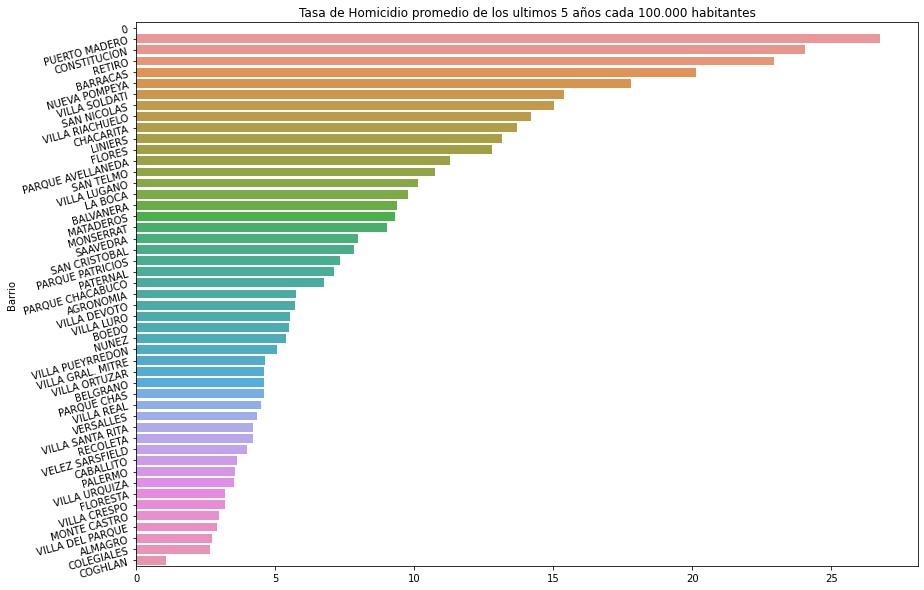

In [14]:
# Barras horizontales tasa de Homicidio promedio de los ultimos 5 años cada 100.000 habitantes

homic21 = fdata.loc[fdata.tipo == "Homicidio"]
homic21 = homic21.loc[homic21.año == 2021]

homic21 = homic21.groupby("barrio",dropna=False).agg({"dia":"count"})


homic20 = fdata.loc[fdata.tipo == "Homicidio"]
homic20 = homic20.loc[homic20.año == 2020]

homic20 = homic20.groupby("barrio").agg({"dia":"count"})


homic19 = fdata.loc[fdata.tipo == "Homicidio"]
homic19 = homic19.loc[homic19.año == 2019]

homic19 = homic19.groupby("barrio").agg({"dia":"count"})


homic18 = fdata.loc[fdata.tipo == "Homicidio"]
homic18 = homic18.loc[homic18.año == 2018]

homic18 = homic18.groupby("barrio").agg({"dia":"count"})


homic17 = fdata.loc[fdata.tipo == "Homicidio"]
homic17 = homic17.loc[homic17.año == 2017]

homic17 = homic17.groupby("barrio").agg({"dia":"count"})


homicidios = homic17.merge(homic18, how = "outer", on = "barrio", suffixes=("2017","2018")) \
                    .merge(homic19, how = "outer", on = "barrio") \
                    .merge(homic20, how = "outer", on = "barrio",suffixes=("2019","2020")) \
                    .merge(homic21, how = "outer", on = "barrio") 

homicidios = homicidios.rename(columns={'dia2017':'2017', 'dia2018':'2018', 'dia2019':'2019', 'dia2020':'2020', 'dia':'2021'})

homicidios = homicidios.reset_index()

barr = fdata.groupby("barrio").agg({"Poblacion":"min"})

barr = barr.reset_index()

homicidios = barr.merge(homicidios, how = "outer", on = "barrio")

homicidios = homicidios.fillna(0)

homicidios['promedio'] = homicidios[['2017', '2018', '2019', '2020', '2021']].mean(axis=1)

homicidios['Tasa de Homicidios 100.000 promedio'] = (homicidios['promedio']/homicidios['Poblacion'])*100000

homicidios = homicidios.sort_values('Tasa de Homicidios 100.000 promedio', ascending=False)


plt.figure(figsize=(14, 10))

sns.barplot(
    x="Tasa de Homicidios 100.000 promedio",
    y="barrio",
    data=homicidios
    
).set(
    title="Tasa de Homicidio promedio de los ultimos 5 años cada 100.000 habitantes", 
    ylabel="Barrio",
    xlabel=None
)
    
plt.yticks(rotation=15)
plt.show()


In [15]:
homicidios.sort_values("Tasa de Homicidios 100.000 promedio", ascending=False).head()

,barrio,Poblacion,2017,2018,2019,2020,2021,promedio,Tasa de Homicidios 100.000 promedio
48,0,0.0,0.0,0.0,0.0,0.0,1.0,0.2,inf
26,PUERTO MADERO,6726.0,1.0,4.0,2.0,0.0,2.0,1.8,26.761820
10,CONSTITUCION,44107.0,12.0,11.0,7.0,16.0,7.0,10.6,24.032467
28,RETIRO,65413.0,15.0,16.0,16.0,21.0,7.0,15.0,22.931222
3,BARRACAS,89452.0,15.0,13.0,22.0,19.0,21.0,18.0,20.122524


In [10]:
# Los ultimos dos graficos se hicieron extrayendo la cantidad de crimenes (dependiendo el tipo) y logrando un promedio desde 2017 hasta 2021, con este epromedio se 
# realizo un ratio de criminalidad por 100.000 habitantes dependiendo el tipo de crimen a analizar.


In [16]:
# Cantidades de delitos por año y mes

gg = fdata.loc[fdata['año'].isin([2019,2020,2021])]
gg = gg.groupby(["año","mes"]).agg({"dia":"count"})

gg

dia
año  mes              
2019 Diciembre    9825
     Enero       10507
     Noviembre   10123
     Octubre     10260
     Septiembre   9926
     abril       10256
     agosto      10139
     febrero     10141
     julio        9984
     junio        9641
     marzo       11247
     mayo        10435
2020 Abril        1922
     Agosto       4650
     Diciembre    6681
     Enero        9865
     Febrero      9397
     Julio        4104
     Junio        3716
     Marzo        6033
     Mayo         3121
     Noviembre    6515
     Octubre      5740
     Septiembre   4981
2021 Abril        6583
     Agosto       7692
     Diciembre    8593
     Enero        7258
     Febrero      6916
     Julio        7366
     Junio        6741
     Marzo        8014
     Mayo         5872
     Noviembre    8509
     Octubre      7708
     Septiembre   7315

In [18]:
# Cambio porcentual de robos a travez de los años

groupedrobos = fdata.loc[fdata.tipo == "Robo (con violencia)"]
groupedrobos = groupedrobos.groupby(["año"]).agg({"dia":"count"})
groupedrobos ["Cambio Porcentual Ratio"] = groupedrobos.dia.pct_change()
groupedrobos

,dia,Cambio Porcentual Ratio
año,,
2017,68297,NaN
2018,71121,0.041349
2019,62829,-0.116590
2020,34460,-0.451527
2021,44825,0.300784


In [19]:
# Cambio porcentual de homicidios a travez de los años

groupedhomicidios = fdata.loc[fdata.tipo == "Homicidio"]
groupedhomicidios = groupedhomicidios.groupby(["año"]).agg({"dia":"count"})
groupedhomicidios ["Cambio Porcentual Ratio"] = groupedhomicidios.dia.pct_change()
groupedhomicidios

,dia,Cambio Porcentual Ratio
año,,
2017,266,NaN
2018,277,0.041353
2019,198,-0.285199
2020,201,0.015152
2021,193,-0.039801


El dashboard completo con el análisis definitivo se encuentra en Tableau. Link: https://public.tableau.com/app/profile/oliver.tomas/viz/DelitosCABA-CiudadAutnomadeBuenosAires/Dashboard2.